## Import the data ##

In [1]:
import pandas as pd
import numpy as np
    
df = pd.read_csv('order_history.csv')

df['date'] = pd.to_datetime(df['date'], utc=True)

df = df.set_index('date')

df = df.sort_index()

df

,order_id,client_id,product_family_id,qty,total_price
date,,,,,
2014-01-06,sdEPtaazzrE,CBwaVzs,12,2,102.833333
2014-01-06,sdEPtaazzya,CZwaZa,3,1,9.666667
2014-01-06,sdEPtaazzot,CZBwZrt,3,1,10.416667
2014-01-06,sdEPtaazzyy,CBwazB,2,1,226.666667
2014-01-06,sdEPtaazzyy,CBwazB,11,1,16.583333
2014-01-06,sdEPtaazzoU,CBwazz,1,2,297.500000
2014-01-06,sdEPtaazzUP,CBzszBzs,2,1,32.416667
2014-01-06,sdEPtaazzry,CBzrtza,5,2,20.000000
2014-01-06,sdEPtaazzit,CZzaaB,5,2,5.500000


## Study clients data ##

In [2]:
clients_group=df.groupby(['client_id'])
clients_ordered_product_families_df = clients_group['product_family_id'].nunique()
clients_orders_df = clients_group['order_id'].nunique()
clients_revenue_df = clients_group['total_price'].sum()

clients_stats_df = clients_orders_df.to_frame('order_count')
clients_stats_df = clients_stats_df.join(clients_ordered_product_families_df.to_frame('product_families_count'))
clients_stats_df = clients_stats_df.join(clients_revenue_df.to_frame('revenue'))
clients_stats_df = clients_stats_df.sort_values(by='order_count', ascending=False)
clients_stats_df['revenue_per_order'] = clients_stats_df['revenue'] / clients_stats_df['order_count']

clients_stats_df

,order_count,product_families_count,revenue,revenue_per_order
client_id,,,,
CZzaaB,2254,9,508943.225000,225.795575
CBwBazs,949,9,82043.674167,86.452765
CZwaZzs,403,11,52391.548333,130.003842
CZBwZrt,389,9,53867.563333,138.477027
CBwwwa,376,11,41186.097500,109.537493
CBzswVzs,372,3,72125.214167,193.884984
CBwzaa,285,10,58084.488333,203.805222
CZzszszB,267,10,28156.285000,105.454251
CZaaBz,231,9,59252.550833,256.504549


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d84e4a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110c87b00>]], dtype=object)

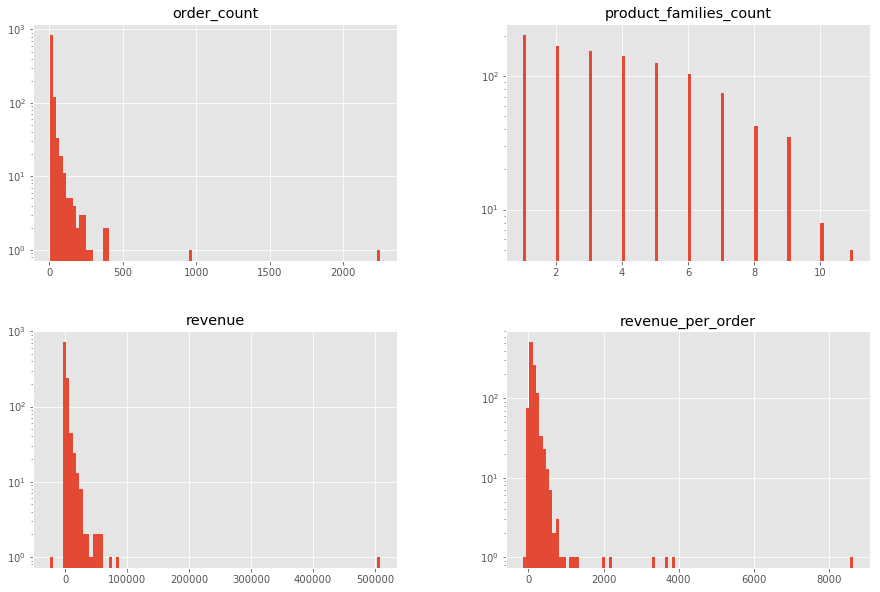

In [3]:
# Setup matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

s = (15, 10)

%matplotlib inline

clients_stats_df.hist(log=True, bins=100, figsize=s)

## Predicting orders per product families ##

### product '2' for client 'CZzaaB' ###

In [4]:
def select_orders(original_df, client_id, product_family_id):
    selection_df = original_df.loc[lambda df: (df.client_id == client_id) & (df.product_family_id == product_family_id),:]
    selection_groups=selection_df[['qty', 'total_price']].groupby([selection_df.index])

    selection_df = (selection_groups['qty'].sum().to_frame('qty')
                    .join(selection_groups['total_price'].sum().to_frame('total')))

    selection_df['date'] = selection_df.index

    selection_df[['last_order_date', 'last_order_qty', 'last_order_total']] = selection_df[['date', 'qty', 'total']].shift()

    selection_df = selection_df.resample('D').asfreq()

    selection_df['date'] = selection_df.index

    selection_df[['qty', 'total']] = selection_df[['qty', 'total']].fillna(0)
    selection_df[['last_order_qty','last_order_date', 'last_order_total']] = selection_df[['last_order_qty','last_order_date', 'last_order_total']].bfill()

    selection_df['time_since_last_order'] = selection_df['date'] - selection_df['last_order_date']
    
    return selection_df

CZzaaB_2_orders_df=select_orders(df, 'CZzaaB', '2')

CZzaaB_2_orders_df

,qty,total,date,last_order_date,last_order_qty,last_order_total,time_since_last_order
date,,,,,,,
2014-01-06,6.0,297.000000,2014-01-06,2014-01-06,6.0,297.000000,0 days
2014-01-07,28.0,2013.416667,2014-01-07,2014-01-06,6.0,297.000000,1 days
2014-01-08,0.0,0.000000,2014-01-08,2014-01-07,28.0,2013.416667,1 days
2014-01-09,0.0,0.000000,2014-01-09,2014-01-07,28.0,2013.416667,2 days
2014-01-10,1.0,74.083333,2014-01-10,2014-01-07,28.0,2013.416667,3 days
2014-01-11,0.0,0.000000,2014-01-11,2014-01-10,1.0,74.083333,1 days
2014-01-12,0.0,0.000000,2014-01-12,2014-01-10,1.0,74.083333,2 days
2014-01-13,0.0,0.000000,2014-01-13,2014-01-10,1.0,74.083333,3 days
2014-01-14,14.0,1037.166667,2014-01-14,2014-01-10,1.0,74.083333,4 days


In [5]:
from os import environ
from dotenv import load_dotenv, find_dotenv
from craftai import client as craftai

load_dotenv(find_dotenv())

# Create a craft ai client
config = {
    "token": environ.get("CRAFT_TOKEN")
}

client = craftai.CraftAIClient(config)

agent_cfg = {
    "context": {
        "timezone": {
            "type": "timezone"
        },
        "day_of_week": {
            "type": "day_of_week"
        },
        "days_since_last_order": {
            "type": "continuous"
        },
        "last_order_qty": {
            "type": "continuous"
        },
        "last_order_total": {
            "type": "continuous"
        },
        "qty": {
            "type": "continuous"
        }
    },
    "output": ["qty"],
    "time_quantum": 60 * 60 * 24
}
    
def operation_from_row(row):
    return {
        'timestamp': row.name.timestamp() + 12 * 60 * 60, # Make sure we are after midnight
        'context': {
            'timezone': '+00:00',
            'last_order_qty': row['last_order_qty'],
            'last_order_total': row['last_order_total'],
            'days_since_last_order': row['time_since_last_order'].days,
            'qty': row['qty']
        }
    }



def create_agent(df, client_id, product_family):
    agent=client_id + '_' + product_family
    
    client.delete_agent(agent)
    client.create_agent(agent_cfg, agent)
    
    operations=[]

    for index,row in df.iterrows():
        operations.append(operation_from_row(row))

    client.add_operations(agent, operations)

    return client.get_shared_agent_inspector_url(agent)
    
create_agent(CZzaaB_2_orders_df, 'CZzaaB', '2')

'https://beta.craft.ai/shared/S12P-JpeZ'